<a href="https://colab.research.google.com/github/hariprasath1291/personal-site/blob/master/Copy_of_SkinCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. IMPORTING REQUIRED LIBRARIES

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 pip install cmake 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!nvidia-smi

Fri Apr 14 11:02:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.layers import GlobalAveragePooling2D, Lambda
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import warnings
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image

K.clear_session()

In [27]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [28]:
train_folder = "/content/drive/MyDrive/IsIc dataset/train/"
test_folder = "/content/drive/MyDrive/IsIc dataset/test/"

In [29]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (299, 299),
    color_mode="rgb",
    batch_size = 48,
    class_mode = 'categorical',
    seed = 42)

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (299, 299),
    color_mode="rgb",
    batch_size = 48, 
    class_mode = 'categorical',
    seed = 42)

Found 2717 images belonging to 2 classes.
Found 719 images belonging to 2 classes.


In [30]:
print(len(test_set[0]))

2


In [31]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(test_folder))

There are 344 files in malignant
There are 375 files in benign


In [32]:
# 2. PREPROCESSING

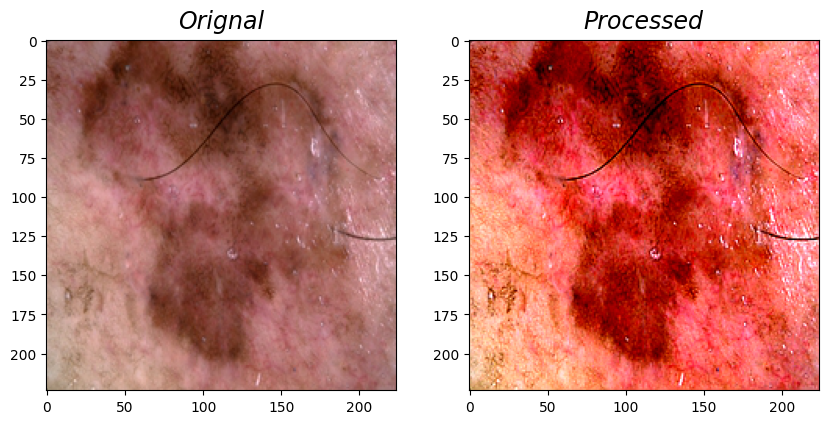

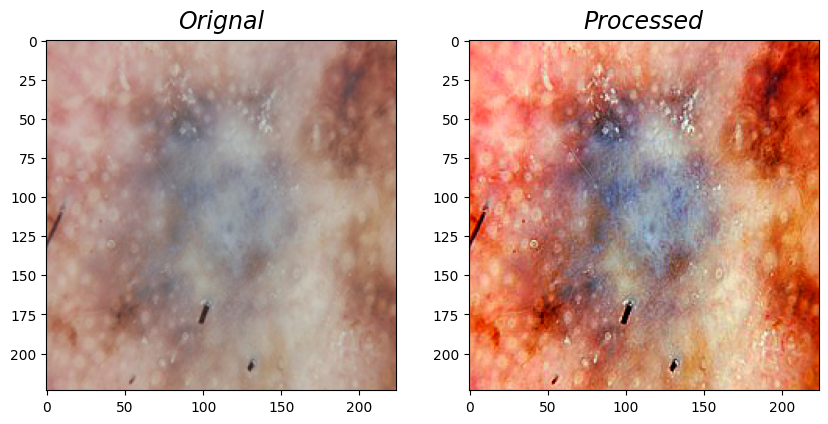

In [33]:
image_folder="malignant"
image_folder1="benign"
number_of_images=2     

def Preprocess():
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(train_folder,image_folder)
        folder1=os.path.join(train_folder,image_folder1)
        a=random.choice(os.listdir(folder))
        b=random.choice(os.listdir(folder1))

        image=Image.open(os.path.join(folder,a))
        image1=Image.open(os.path.join(folder1,b))
        image_duplicate=image.copy()
        image_duplicate1=image1.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='8.5', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.55)
        image1=ImageEnhance.Contrast(image1).enhance(1.65)
        image1=ImageEnhance.Sharpness(image1).enhance(3.0)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='8.5', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
Preprocess()

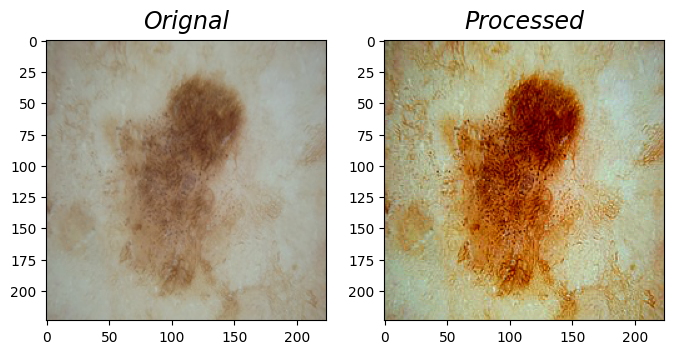

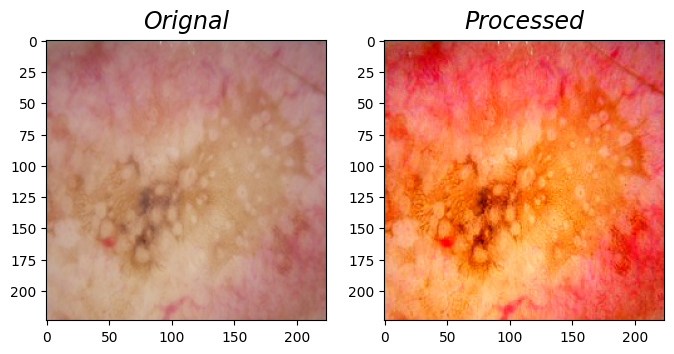

In [34]:

image_folder="malignant"
image_folder1="benign"
number_of_images=2     

def Preprocess():
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(test_folder,image_folder)
        folder1=os.path.join(test_folder,image_folder1)
        a=random.choice(os.listdir(folder))
        b=random.choice(os.listdir(folder1))

        image=Image.open(os.path.join(folder,a))
        image1=Image.open(os.path.join(folder1,b))
        image_duplicate=image.copy()
        image_duplicate1=image1.copy()
        plt.figure(figsize=(8,8))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='8.5', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.55)
        image1=ImageEnhance.Contrast(image1).enhance(1.65)
        image1=ImageEnhance.Sharpness(image1).enhance(3.0)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='8.5', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
Preprocess()

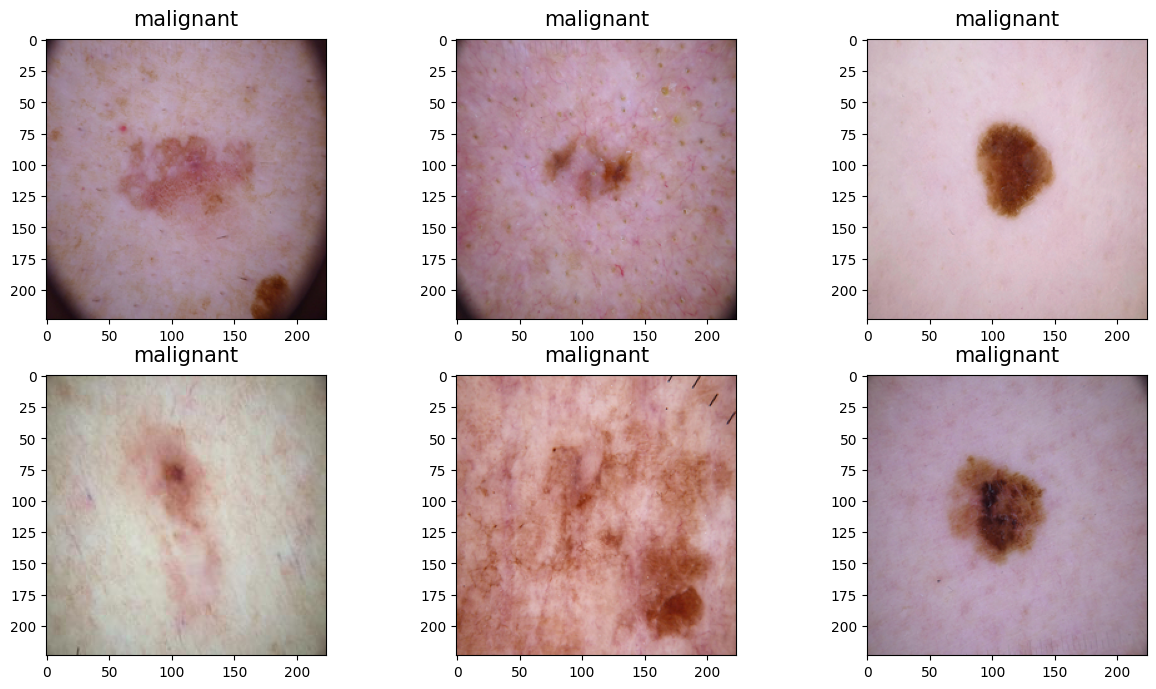

In [35]:
select_folder="malignant"
rows,columns = 2,3

display_folder=os.path.join(train_folder,select_folder)
total_images=rows*columns
fig=plt.figure(1, figsize=(15, 8))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_folder,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_folder, pad = 10, size=15)
    plt.imshow(img)
    
    if i==total_images-1:
        break

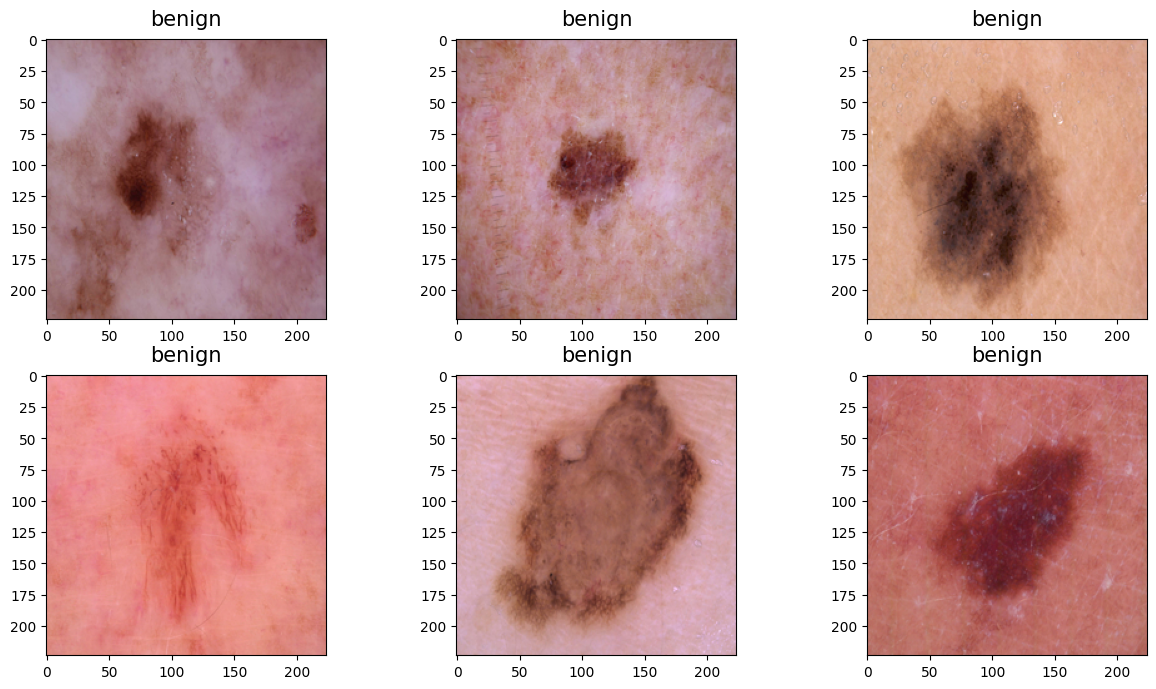

In [36]:
select_folder="benign"
rows,columns = 2,3

display_folder=os.path.join(train_folder,select_folder)
total_images=rows*columns
fig=plt.figure(1, figsize=(15, 8))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_folder,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_folder, pad = 10, size=15)
    plt.imshow(img)
    
    if i==total_images-1:
        break

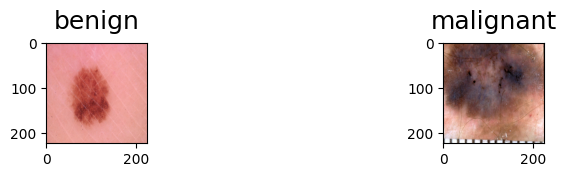

In [37]:
images = []

for image_folder in sorted(os.listdir(train_folder)):
    leaf = os.listdir(train_folder + '/' + image_folder)
    img_selected = np.random.choice(leaf)
    images.append(os.path.join(train_folder,image_folder,img_selected))
                                     
fig=plt.figure(1, figsize=(20, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(7, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

In [38]:
n_cat =2

batch_size = 48
batch_size_predict = 128
input_shape = (299,299)

In [39]:
#3. MODEL BUILDING

In [40]:
x_model = Xception(input_shape=list(input_shape) + [3], 
                   weights='imagenet', 
                   include_top=False)

In [41]:
for layer in x_model.layers:
    layer.trainable = True

for layer in x_model.layers[:85]:
    layer.trainable = False   
    
x_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [42]:
gm_exp = tf.Variable(3., dtype=tf.float32)
def generalized_mean_pool_2d(X):
    pool = (tf.reduce_mean(tf.abs(X**(gm_exp)), 
                           axis=[1,2], 
                           keepdims=False)+1.e-8)**(1./gm_exp)
    return pool

In [43]:
# model = Sequential()

In [45]:
X_feat = Input(x_model.output_shape[1:])

lambda_layer = Lambda(generalized_mean_pool_2d)
lambda_layer.trainable_weights.extend([gm_exp])
X = lambda_layer(X_feat)
flatten = Flatten()(x_model.output)
X=Dense((n_cat*128),activation='relu')(X)
X=Dense((n_cat*64),activation='relu')(X)
X=Dense((n_cat*32),activation='relu')(X)
X=Dense((n_cat*16),activation='relu')(X)
X = Dropout(0.05)(X)
flatten = Activation('relu')(X)
dense = Dense(n_cat, activation = 'relu')(flatten)
X = Dense(n_cat, activation='softmax')(X)
# dense = Dense(n_cat, activation = 'relu')(flatten)
# dense = Dense(n_cat, activation = 'relu')(dense)
# dense = Dense(n_cat, activation = 'relu')(dense)
# dense = Dense(n_cat, activation = 'relu')(dense)
# prediction = Dense(2, activation = 'softmax')(dense)

top_model = Model(inputs=X_feat, outputs=X)
top_model.summary()

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 10, 2048)]    0         
                                                                 
 lambda_1 (Lambda)           (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0   

In [46]:
X_image = Input(list(input_shape) + [3])

X_f = x_model(X_image)
X_f = top_model(X_f)

model = Model(inputs=X_image, outputs=X_f)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 model_1 (Functional)        (None, 2)                 567842    
                                                                 
Total params: 21,429,322
Trainable params: 12,198,154
Non-trainable params: 9,231,168
_________________________________________________________________


In [47]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [48]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    color_mode="rgb",
    batch_size = 32,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    color_mode="rgb",
    batch_size = 32, 
    class_mode = 'categorical')

Found 2717 images belonging to 2 classes.
Found 719 images belonging to 2 classes.


In [49]:
class_map = training_set.class_indices
class_map

{'benign': 0, 'malignant': 1}

In [50]:
Model = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
85/85 [==============================] - 363s 4s/step - loss: 0.4269 - accuracy: 0.7921 - val_loss: 0.5821 - val_accuracy: 0.7914
Epoch 2/30
85/85 [==============================] - 54s 632ms/step - loss: 0.3193 - accuracy: 0.8631 - val_loss: 0.3516 - val_accuracy: 0.8512
Epoch 3/30
85/85 [==============================] - 55s 643ms/step - loss: 0.2811 - accuracy: 0.8752 - val_loss: 0.4372 - val_accuracy: 0.8720
Epoch 4/30
85/85 [==============================] - 56s 655ms/step - loss: 0.2460 - accuracy: 0.8900 - val_loss: 0.4378 - val_accuracy: 0.8637
Epoch 5/30
85/85 [==============================] - 55s 650ms/step - loss: 0.2155 - accuracy: 0.9073 - val_loss: 0.3889 - val_accuracy: 0.8693
Epoch 6/30
85/85 [==============================] - 54s 633ms/step - loss: 0.1854 - accuracy: 0.9168 - val_loss: 0.3693 - val_accuracy: 0.8693
Epoch 7/30
85/85 [==============================] - 54s 637ms/step - loss: 0.1845 - accuracy: 0.9231 - val_loss: 0.3591 - val_accuracy: 0.8609
E

In [51]:
from keras.callbacks import ModelCheckpoint

In [52]:
filepath = "skincancer.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
print(checkpoint.best)

inf


In [53]:
model.save("skincancer.h5")

In [54]:
new_model = load_model("skincancer.h5")

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [55]:
# 4. ACCURACY SCORE PLOT

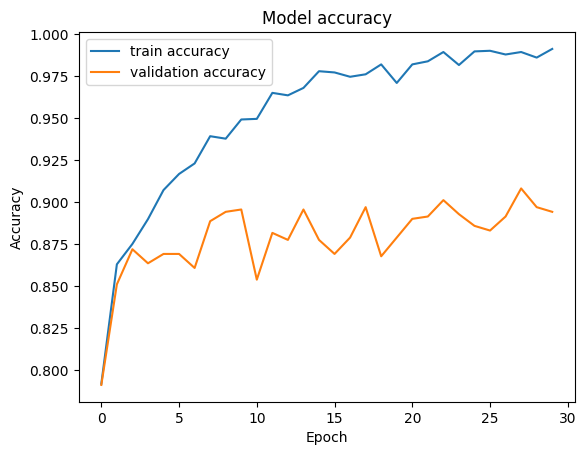

In [56]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

plot_accuracy(Model)

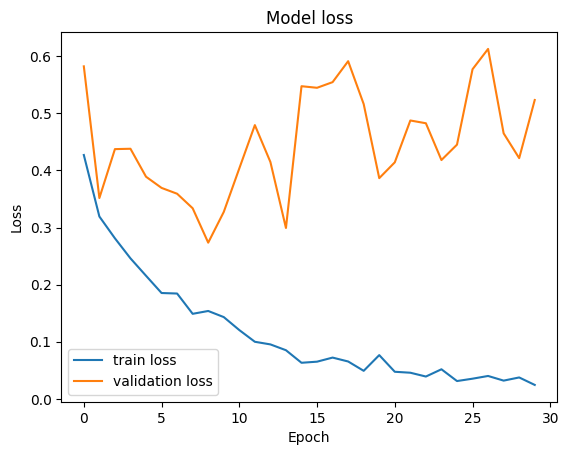

In [57]:
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    

plot_loss(Model)

In [73]:
# Using the test dataset
score = model.evaluate(test_set,batch_size=128)
print('Test loss:', np.round(score[0]*100))
print('Test accuracy:', np.ceil(score[1]*100))

23/23 [==============================] - 5s 192ms/step - loss: 0.5232 - accuracy: 0.8943
Test loss: 52.0
Test accuracy: 90.0


In [75]:
validation_data_dir = '/content/drive/MyDrive/IsIc dataset/test'

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(299,299),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.2f}".format(np.ceil(scores[1]*100)))

Found 719 images belonging to 2 classes.
Test Accuracy: 91.00


In [60]:
category={
    0:'benign',1:'malignant'
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

1/1 [==============================] - 1s 1s/step


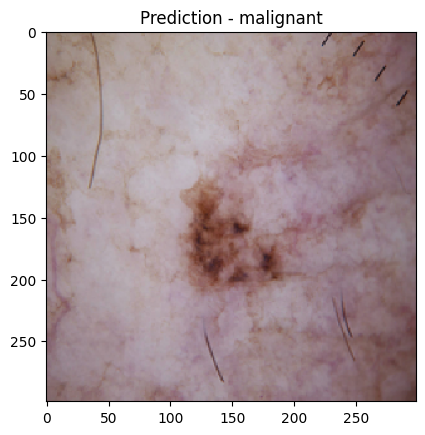

In [61]:
predict_image(os.path.join(validation_data_dir,'malignant/1027.jpg'),model)

1/1 [==============================] - 0s 28ms/step


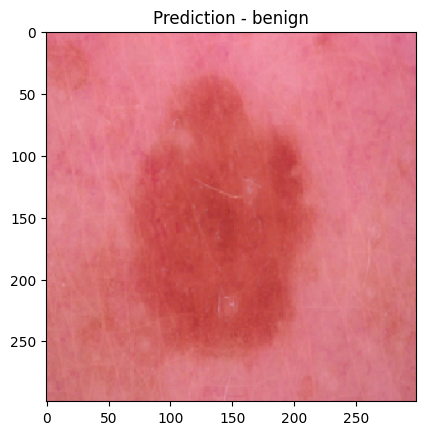

In [62]:
predict_image(os.path.join(validation_data_dir,'benign/1042.jpg'),model)

In [63]:
# 5. CONFUSION MATRIX

In [64]:
def labels_confusion_matrix(test_folder):
    
    folder_path=test_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(299,299))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 2
    cmap="OrRd"
    cm_plot_labels = [i for i in range(2)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) 
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) 

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

1/1 [==============================] - 0s 26ms/step


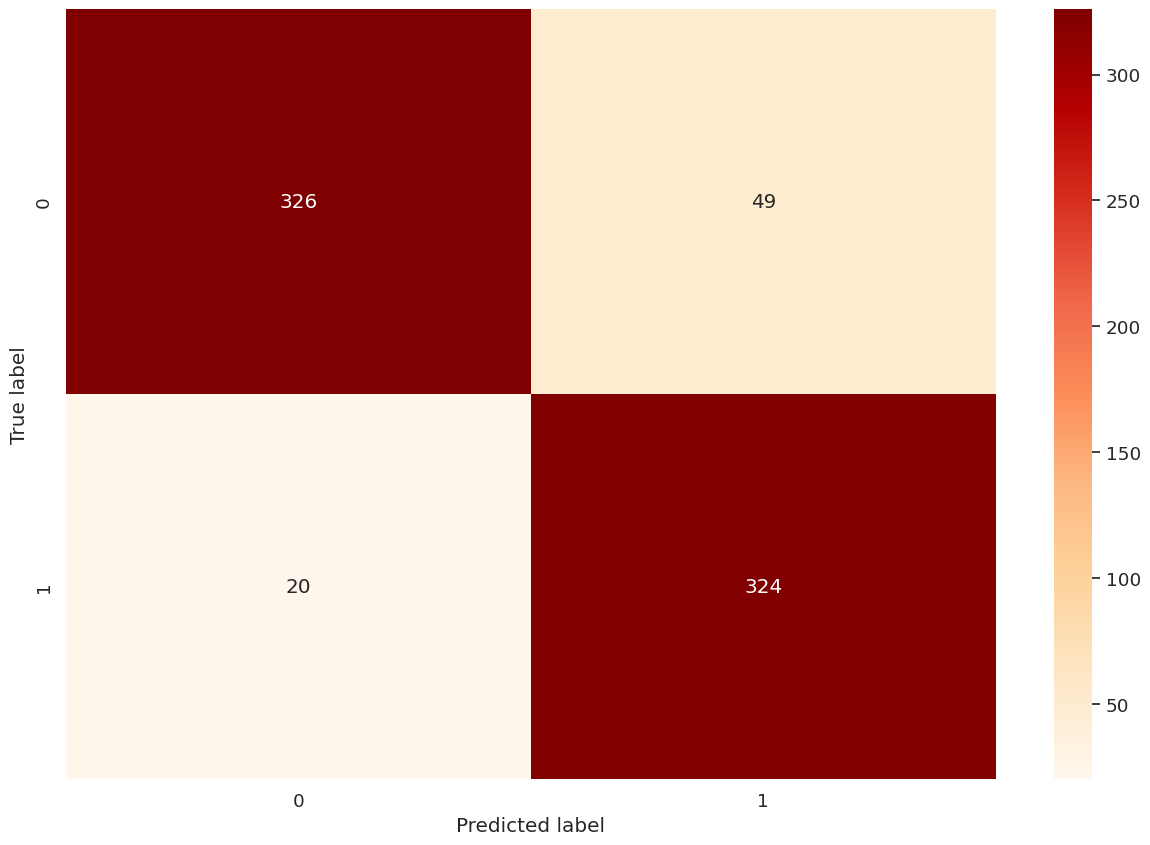

In [65]:
y_true,y_pred=labels_confusion_matrix(test_folder)
print_confusion_matrix(y_true,y_pred)